In [2]:
import torch_geometric
from torch_geometric.datasets import ModelNet

# Set the path where you want to store/download the dataset
dataset_path = "./ModelNey"

# Initialize the dataset
modelnet_dataset = ModelNet(root=dataset_path, name='40')

Extracting ModelNey/ModelNet40.zip
Processing...
Done!


In [28]:
print(modelnet_dataset)
print(modelnet_dataset[3000].y)

ModelNet40(9843)
tensor([8])


In [18]:
import open3d as o3d

# Assuming modelnet_dataset[0] is the mesh you want to visualize
data = modelnet_dataset[3000]

# Convert to numpy arrays
vertices = data.pos.numpy()
faces = data.face.numpy().T  # Transpose to align with Open3D's expectations

# Create Open3D mesh
mesh = o3d.geometry.TriangleMesh()
mesh.vertices = o3d.utility.Vector3dVector(vertices)
mesh.triangles = o3d.utility.Vector3iVector(faces)

# Optionally: Compute normals for better visualization
mesh.compute_vertex_normals()

# Visualize the mesh
o3d.visualization.draw_geometries([mesh])

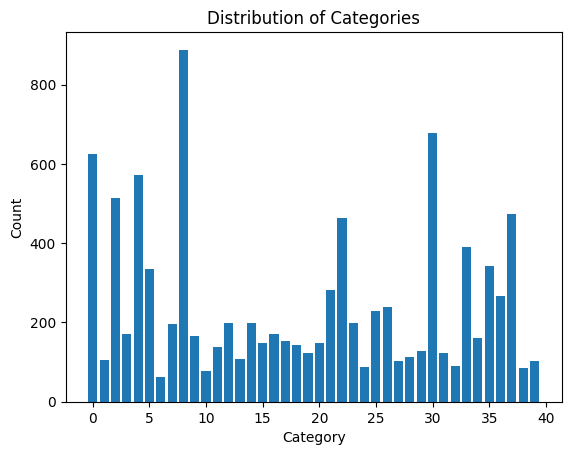

In [60]:
import visualization
from importlib import reload
reload(visualization)

v = visualization.class_distribution(modelnet_dataset, lambda data: data.y.item())

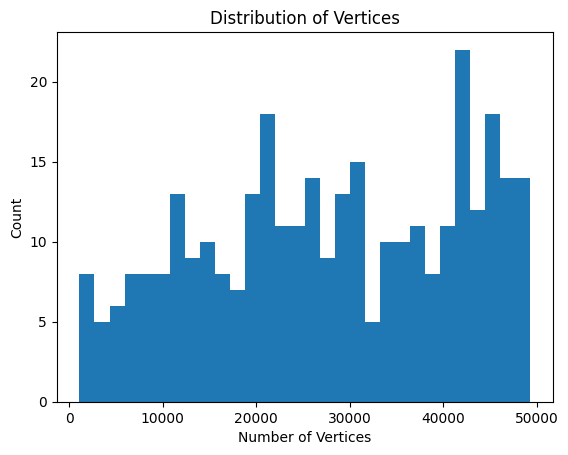

27877.328267477205
329
(329,)


In [59]:
from importlib import reload
reload(visualization)

import numpy as np

# v = visualization.vertices_distribution(modelnet_dataset,
#                     lambda data: data.pos.shape[0] < 5000)

CLASS = 0
v = visualization.vertices_distribution_in_class(modelnet_dataset,
                    lambda data: data.y.item() == CLASS and data.pos.shape[0] < 50000)

rr = np.asarray(v)

print(np.mean(rr))
print((rr < 150000).sum())
print(rr.shape)